## Pyber Observable Trends Based on the Data
* The law of supply and demand is evident in the relationship between city type, the number of drivers, as well as the number of rides and fares.
* The more drivers there are, the more rides and the lower the fare is.
* Drivers in urban cities dominate with 81% of the total drivers, making up 68% of total rides, but only 63% of total fares.
* Drivers in rural cities are lacking with only 3% of the total drivers, making up 5% of total rides, but contributing 7% of the total fare.
* The most surprising are suburban city drivers making up 17% of the total drivers, but contributing 26% of the total rides, making up 31% of the total fares.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_data_df, city_data_df, on="city")

# Display the data table for preview
pyber_df.drop_duplicates("city").reset_index(drop=True).head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [5]:
#create variables for city type, used for scatter plot
urban = pyber_df[pyber_df["type"] == "Urban"]
suburban = pyber_df[pyber_df["type"] == "Suburban"]
rural = pyber_df[pyber_df["type"] == "Rural"]

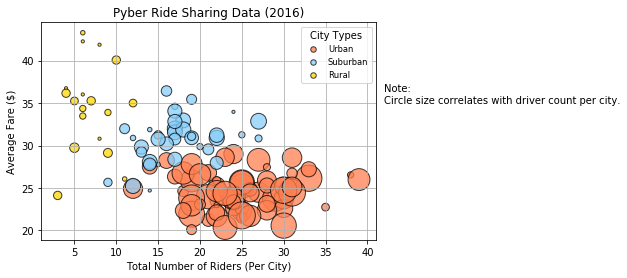

In [6]:
# Obtain the x and y coordinates for each of the three city types
urban_ride_count = urban.groupby(["city"]).count()["ride_id"]
urban_fare_avg = urban.groupby(["city"]).mean()["fare"]
urban_driver_count = urban.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban.groupby(["city"]).count()["ride_id"]
suburban_fare_avg = suburban.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural.groupby(["city"]).count()["ride_id"]
rural_fare_avg = rural.groupby(["city"]).mean()["fare"]
rural_driver_count = rural.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(urban_ride_count, urban_fare_avg, s = urban_driver_count*10,
            color = "coral", edgecolor = "black", label = "Urban", alpha = 0.75)

plt.scatter(suburban_ride_count, suburban_fare_avg, s = suburban_driver_count*10,
            color = "lightskyblue", edgecolor = "black", label = "Suburban", alpha = 0.75)

plt.scatter(rural_ride_count, rural_fare_avg, s = rural_driver_count*10,
            color = "gold", edgecolor = "black", label = "Rural", alpha = 0.75)


# Incorporate the other graph properties
plt.xlim(1, 41)
plt.ylim(18.9,44.5)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(loc="best", title="City Types", fontsize="small")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.annotate("Note: \nCircle size correlates with driver count per city.", xy=(30, 40), xytext=(42, 35))

# Save Figure
plt.savefig("pyber_bubble_plot.png", bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

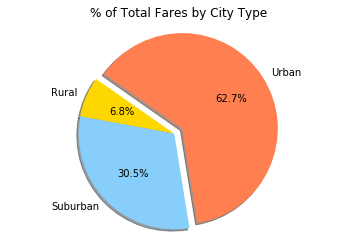

In [7]:
# Calculate Type Fares
total_fare = pyber_df.groupby("type")["fare"].sum()

# Build Pie Chart
city_type = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "coral"]
explode = (0, 0, 0.1)

plt.title("% of Total Fares by City Type")

plt.pie(total_fare, explode = explode, labels = city_type, colors = colors,
        autopct = "%1.1f%%", shadow = True, startangle = 145)

plt.axis("equal")

# Save Figure
plt.savefig("pyber_totalfarescitytype_pie.png")

# Show Figure
plt.show()

## Total Rides by City Type

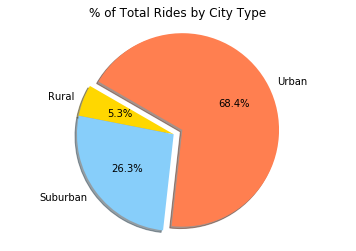

In [8]:
# Calculate Type Fares
total_ride = pyber_df.groupby("type")["ride_id"].count()

# Build Pie Chart
city_type = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "coral"]
explode = (0, 0, 0.1)

plt.title("% of Total Rides by City Type")

plt.pie(total_ride, explode = explode, labels = city_type, colors = colors,
        autopct = "%1.1f%%", shadow = True, startangle = 150)

plt.axis("equal")

# Save Figure
plt.savefig("pyber_totalridescitytype_pie.png")

# Show Figure
plt.show()

## Total Drivers by City Type

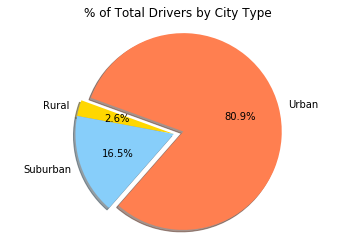

In [9]:
# Calculate Driver Percents
total_drivers = city_data_df.groupby("type")["driver_count"].sum()

# Build Pie Chart
city_type = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "coral"]
explode = (0, 0, 0.1)

plt.title("% of Total Drivers by City Type")

plt.pie(total_drivers, explode = explode, labels = city_type, colors = colors,
        autopct = "%1.1f%%", shadow = True, startangle = 160)

plt.axis("equal")

# Save Figure
plt.savefig("pyber_totaldriverscitytype_pie.png")

# Show Figure
plt.show()